# Análisis Exploratorio de Datos (EDA)

En este notebook, realizaremos un análisis exploratorio de los datos utilizando diversas visualizaciones para entender mejor los datos analizados.
   - **Visualización de Datos:** Creamos gráficos para analizar la relación entre nivel educativo y desempleo, tanto por separado como combinados, y diferenciados por género.
   - **Tratamiento de Datos:** Excluimos datos agregados para obtener una visión más precisa del impacto por género.
   - **Resultados y Conclusiones:** Presentamos los resultados del análisis y discutimos las conclusiones relacionadas con nuestra hipótesis y las diferencias observadas entre países y géneros.

## Importar Librerías y Cargar Datos
Primero, importamos las librerías necesarias y cargamos los datos desde el archivo CSV.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions_EDA import *

In [2]:
# Cargar datos
url = 'df_limpio.csv'
df = cargar_datos(url)

# Mostrar las primeras filas del DataFrame para ver cómo se cargaron los datos
df.head()

,sex,age,level_education,country,year,value_unemployment,value_education,valor_educacion,indice_educativo
0,Females,15-29,ESO,Austria,2014,15.7,27.9,1,2.84
1,Females,15-29,ESO,Austria,2015,15.3,27.5,1,2.89
2,Females,15-29,ESO,Austria,2016,17.1,27.3,1,2.91
3,Females,15-29,ESO,Austria,2017,16.8,27.2,1,2.92
4,Females,15-29,ESO,Austria,2018,13.4,27.1,1,2.92


### Tasa de educación por nivel de educación y género

Se ha utilizado un gráfico de barras para visualizar la distribución de la tasa de educación por nivel educativo y género. En este gráfico, las mujeres destacan en Bachillerato y Universidad, mientras que los hombres predominan en Bachillerato-FP, FP y ESO. Las tasas más altas corresponden a Bachillerato-FP, y las más bajas a Universidad.

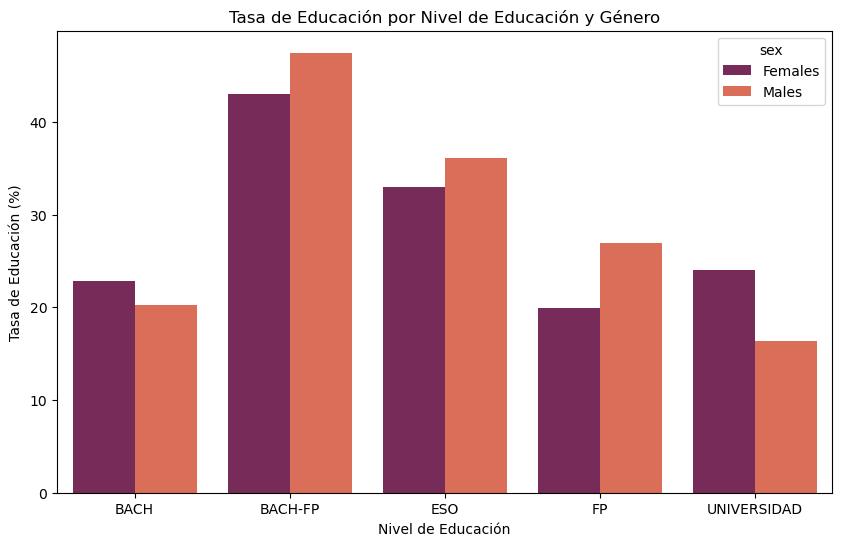

In [3]:
nivel_educ_gene(df)

### Tasa de Educación por Nivel de Educación y País
El gráfico de barras utiliza tres variables clave: índice educativo, países y niveles de educación. La tendencia predominante es que el nivel de Bachillerato-FP tiene el índice más alto en la mayoría de los países, con Serbia y Croacia destacando especialmente. Este nivel educativo supera en longitud a los demás niveles en casi todos los países analizados. Otros niveles educativos, como la educación universitaria, presentan índices más bajos en comparación.

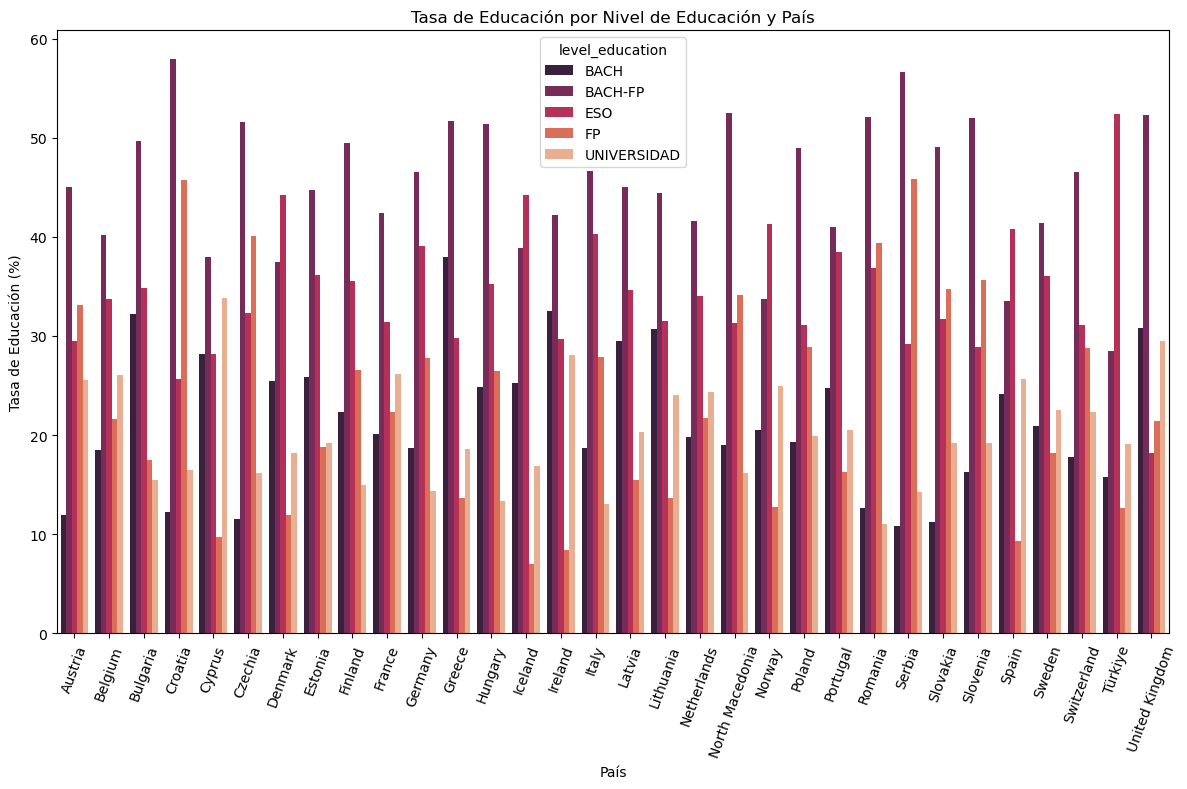

In [4]:
pais_genero_educ(df)

### índice Educativo por país y sexo
El gráfico de barras utiliza las variables índice educativo, país y sexo, mostrando que las mujeres presentan un índice educativo superior en todos los países. Chipre y Reino Unido destacan con las barras más largas, lo que indica los niveles más altos de educación en comparación con otros países.


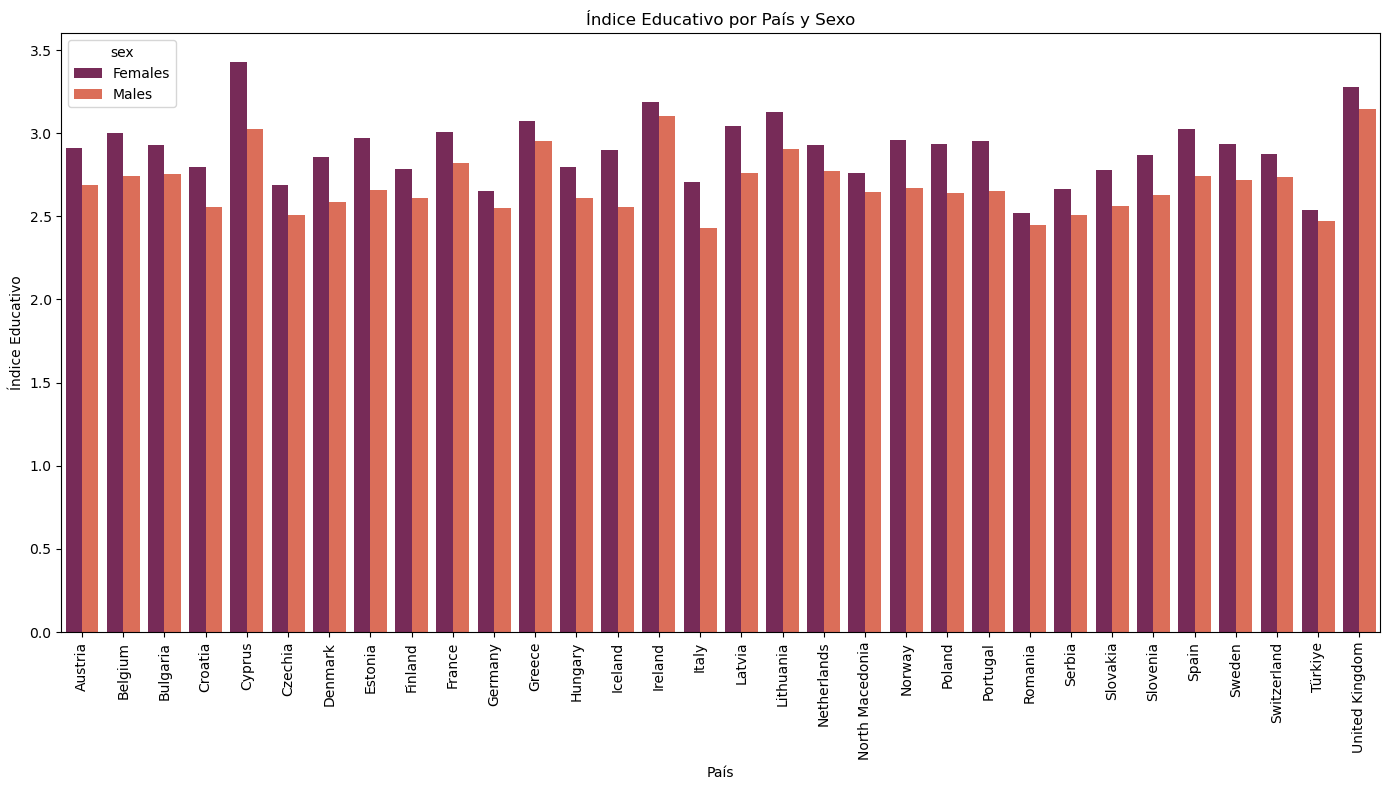

In [5]:
ind_educ_genero(df)

### Tasa de Desempleo por Género y Año
El gráfico de barras muestra la tasa de desempleo por género y año, destacando que en 2014 se alcanzó el valor más alto, seguido de una disminución constante hasta 2019. En 2020, la tasa vuelve a subir, posiblemente debido al impacto del COVID-19, mientras que 2022 y 2023 se mantienen relativamente estables. Las mujeres presentan una tasa de desempleo más alta en todos los años analizados.

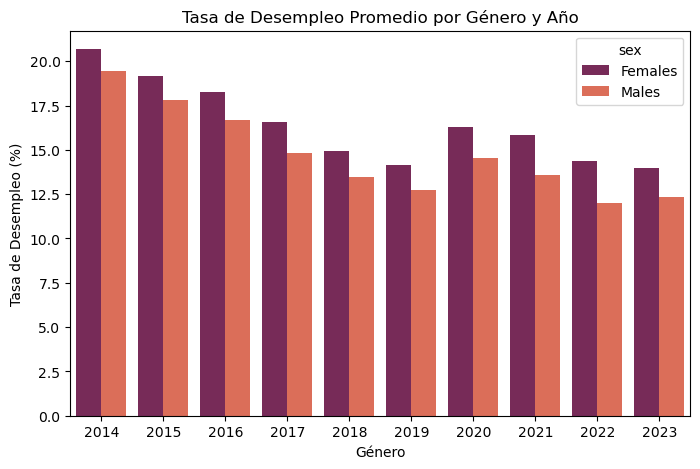

In [6]:
porcen_desempl_genero(df)

### Tasa de Desempleo por Género y País
El gráfico de barras muestra la tasa de desempleo por género y país, donde los valores más altos se observan en Grecia y Macedonia del Norte, seguidos de España, Italia y Serbia. Estos países, especialmente los del sur de Europa, podrían estar experimentando mayores dificultades económicas y estructurales que afectan su mercado laboral. En contraste, países como Alemania, Noruega, Países Bajos y Suiza presentan las tasas de desempleo más bajas. Aunque en la mayoría de los países las mujeres tienen una tasa de desempleo más alta, en aquellos con tasas bajas, los hombres a veces superan a las mujeres.


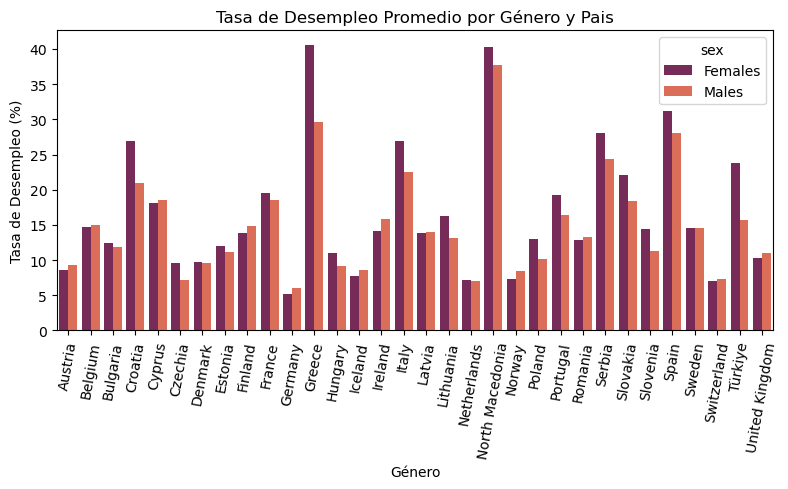

In [7]:
desemp_gener_pais(df)

### Índice Educativo y Tasa de Desempleo por Sexo
El gráfico combinado de barras y líneas utiliza las variables índice educativo, tasa de desempleo y sexo para mostrar la relación entre el nivel educativo y la tasa de desempleo. Las barras representan el índice educativo, mientras que las líneas reflejan la tasa de desempleo para hombres y mujeres en cada país.

En Grecia y Macedonia del Norte, las líneas (tasa de desempleo) superan significativamente a las barras (índice educativo), lo que indica que, a pesar de tener un nivel educativo relativamente elevado, la tasa de desempleo es muy alta. Esto sugiere posibles problemas estructurales en el mercado laboral o la economía, que no permiten que la educación se traduzca en mejores oportunidades laborales.

En contraste, en el Reino Unido, las barras son las más altas, indicando un índice educativo elevado, mientras que las líneas son de las más bajas, lo que sugiere que en este país, a mayor educación, corresponde una menor tasa de desempleo. Esto refuerza la idea de que una economía más estable y desarrollada puede aprovechar mejor la formación educativa de su población.

En general, la mayoría de los países siguen la tendencia de que un mayor índice educativo se asocia con una menor tasa de desempleo, pero hay excepciones importantes como las mencionadas, lo que pone de manifiesto que la relación entre educación y empleo no siempre es directa y puede depender de factores locales o regionales. Además, en la mayoría de los países, las mujeres presentan una mayor tasa de desempleo, incluso cuando tienen un índice educativo más alto que los hombres.

c:\Users\Bapa\Documents\GitHub\project-1\project-ue\functions_EDA.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)


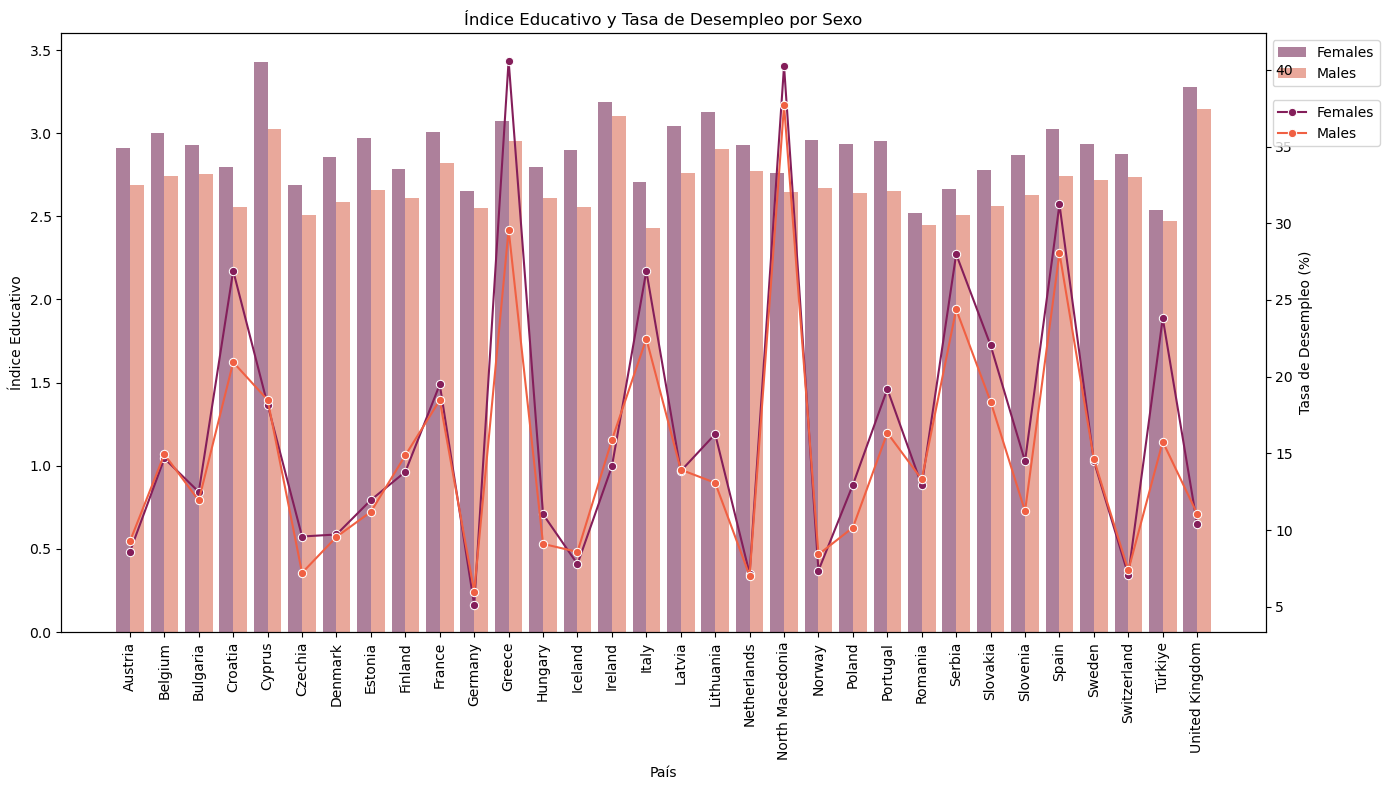

In [8]:
educa_desempl_genero(df)

### Índice Educativo y Tasa de Desempleo por Año

El gráfico de líneas ilustra la evolución del índice educativo y la tasa de desempleo a lo largo de los años.

- Tasa de Desempleo: Comienza muy alta en 2014 y muestra una tendencia de disminución progresiva hasta 2019. En 2020, la tasa de desempleo vuelve a aumentar, probablemente debido al impacto del COVID-19. Después, en 2021 y 2022, la tasa desciende ligeramente, y en 2023 se mantiene prácticamente igual que en el año anterior.

- Índice Educativo: Experimenta un comportamiento opuesto al de la tasa de desempleo. Comienza bajo en 2014 y muestra un aumento constante hasta 2019. En 2020, el índice educativo desciende brevemente, pero luego vuelve a subir en 2021 y 2022, manteniéndose estable en 2023.

Este contraste indica que, mientras la tasa de desempleo tiende a aumentar en tiempos de crisis (como la pandemia), el índice educativo sigue una tendencia general de mejora a lo largo del tiempo, reflejando un aumento en los niveles de educación, incluso durante periodos de dificultad económica.

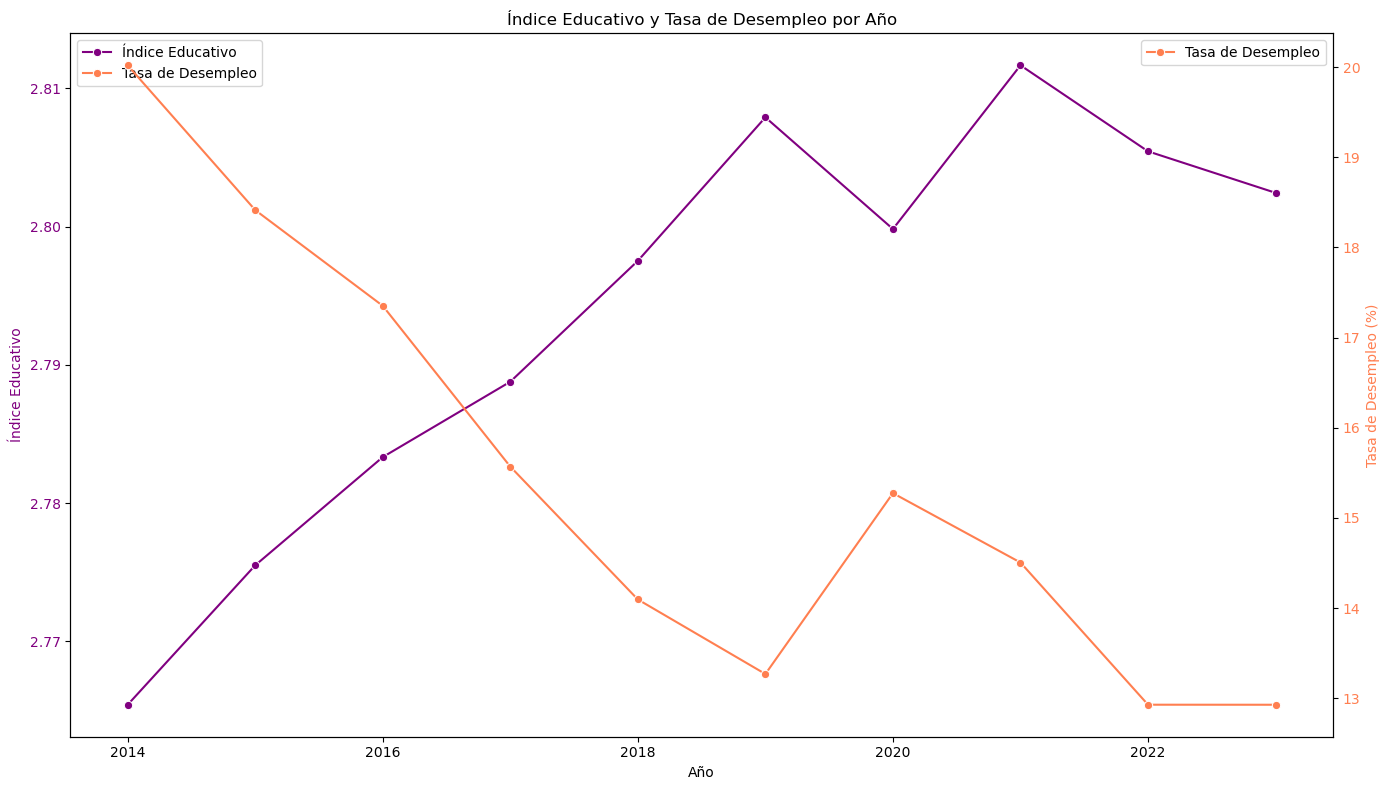

In [9]:
ind_educativo_año(df)

### Extra
El gráfico de dispersión presenta la tasa de desempleo en el eje Y y el índice educativo en el eje X, con los puntos representando diferentes países. En general, los puntos tienden a agruparse en la mitad del eje X y en la parte inferior del eje Y, lo que sugiere que muchos países tienen niveles educativos intermedios y tasas de desempleo relativamente bajas. Sin embargo, hay una considerable dispersión en ambos ejes, indicando que no existe una relación clara y uniforme entre el índice educativo y la tasa de desempleo. Este gráfico se ha incluido para demostrar la variabilidad y la distribución de los datos en diferentes tipos de gráficos.

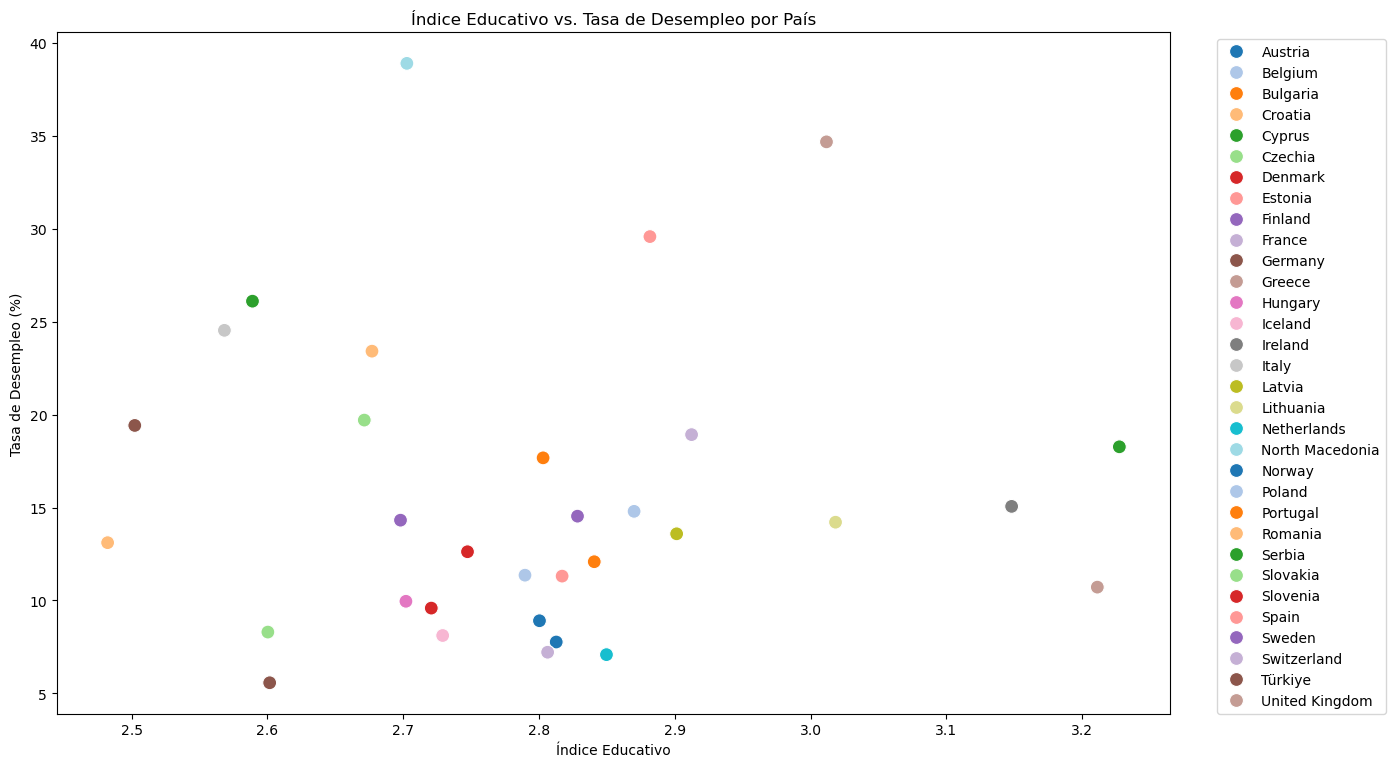

In [10]:
educacion_vs_desempleo(df)